# Ejercicio 3
3- Realice una registración basada en características de la imágenes contenidas en “PAIByB-5”
utilizando detectores de Harris como puntos a emparejar, evaluando los resultados con las métricas
de la GUIA I ¿Qué conclusiones puede sacar al respecto? Comparar los resultados con los ejercicios
anteriores.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, img_as_float
from scipy import fftpack
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from skimage.metrics import normalized_mutual_information as nmi
from skimage.metrics import structural_similarity as ssim, mean_squared_error as mse
from reg_features import Imagen, Registracion, lista_de_paths, agrupar_paths
from reg_toolkit import peak_SNR, getPathfiles

In [4]:
base_dir = 'PAIByB-5'
#extrigo paths 
lista_paths = list(getPathfiles(base_dir).values())
# Agrupar los paths
un_digito, dos_digitos = agrupar_paths(lista_paths)
#aplico la clase Imagen, esta me lee la imagen y calcula los puntos calve 
un_digito_imgs = [Imagen(image, feature_extractor='harris') for image in un_digito ]
dos_digito_imgs = [Imagen(image, feature_extractor='harris') for image in dos_digitos ]


________________________________________________________________________________
Imagen PAIByB-5/img-2.tif
Matches encontrados: 0
Error en la imagen PAIByB-5/img-2.tif
No hay suficientes matches filtrados para calcular la homografía.

________________________________________________________________________________
Imagen PAIByB-5/img-3.tif
Matches encontrados: 87


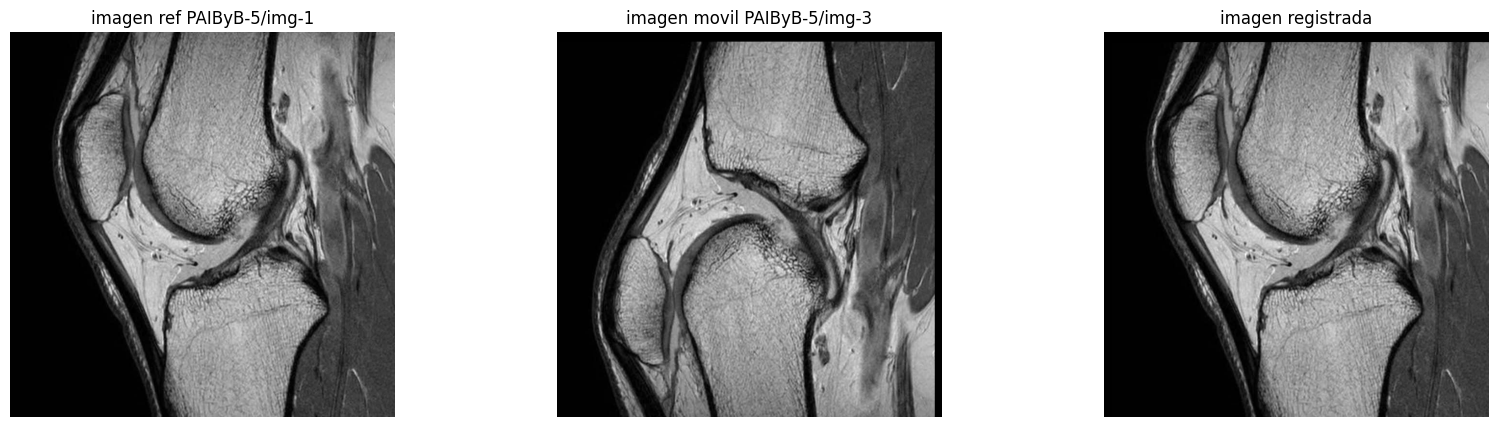

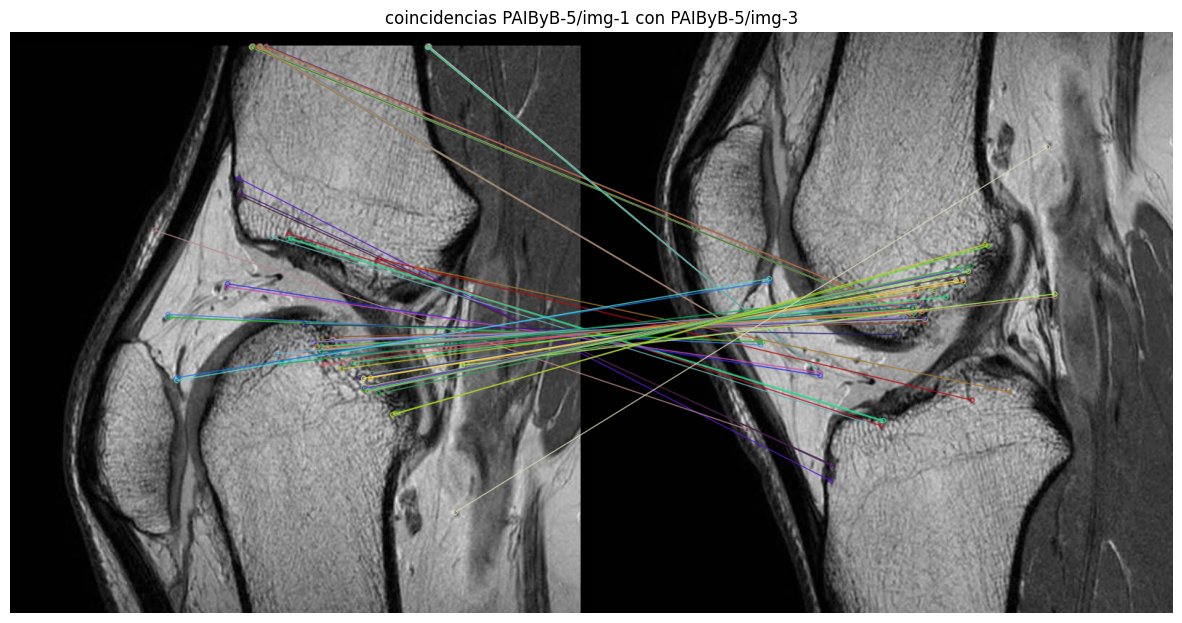

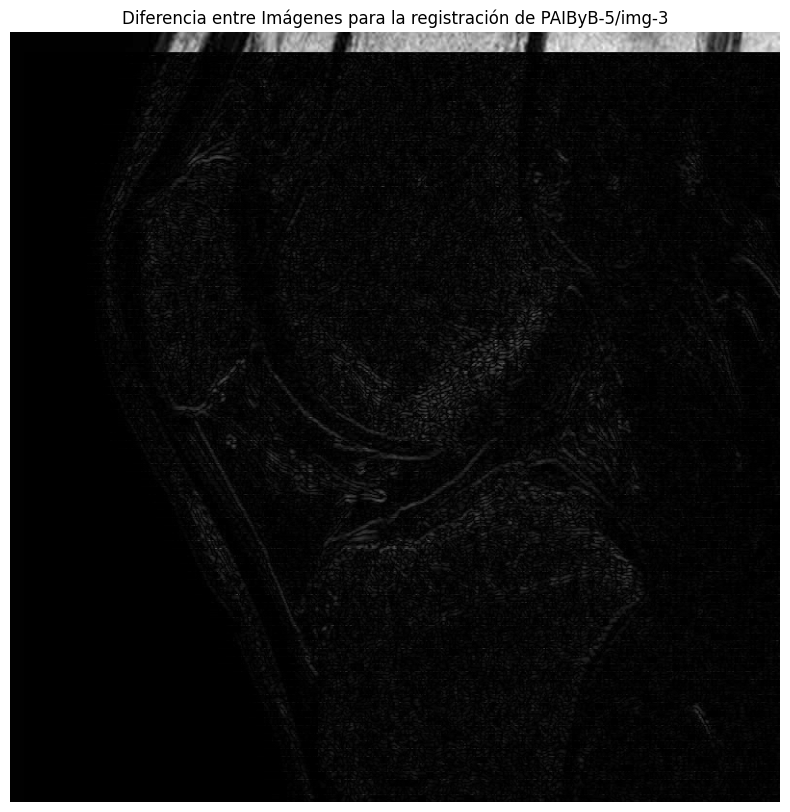

El valor de SSIM es 0.9063100198842953 y el de PSNR es 78.8602635619351

________________________________________________________________________________
Imagen PAIByB-5/img-4.tif
Matches encontrados: 0
Error en la imagen PAIByB-5/img-4.tif
No hay suficientes matches filtrados para calcular la homografía.


In [5]:
for i in range(1,len(un_digito)):
    try:
        print('\n'+80*'_')
        print(f'Imagen {un_digito[i]}')
        # Crea una instancia de Registracion utilizando Harris como descriptor
        prueba = Registracion(imagen_referencia=un_digito_imgs[0],
                              imagen_movil=un_digito_imgs[i],
                              lowe_threshold=1,
                              min_match_count=4)
        prueba.run_pipeline()
    except Exception as e:
        print(f'Error en la imagen {un_digito[i]}')
        print(e)
        continue

In [11]:
for img in dos_digito_imgs[1:]:
    try:
        print('\n'+80*'_')
        print(f'Imagen {img.nombre}')
        # Crea una instancia de Registracion utilizando Harris como descriptor
        prueba = Registracion(imagen_referencia=dos_digito_imgs[0],
                              imagen_movil=img,
                              lowe_threshold=1,
                              ransac_thres=0,
                              min_match_count=4)
        prueba.run_pipeline()
    except Exception as e:
        print(f'Error en la imagen {img.nombre}')
        print(e)
        continue


________________________________________________________________________________
Imagen PAIByB-5/img-12
Matches encontrados: 933
Error en la imagen PAIByB-5/img-12
La homografía no ha sido calculada.
